# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Setup Steps:

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A07E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234568" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="M2W7_CS_2_SVM_vs_MLP_training_samples" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


##Importing required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

## 1. Generating the dataset 

Considering the simple case of a classification task, in which the two classes of points are well separated.

In [0]:
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1)

In [0]:
# Checking the length of X, y
X.shape , y.shape

((1000, 2), (1000,))

To get sense of the data, lets visualize the data

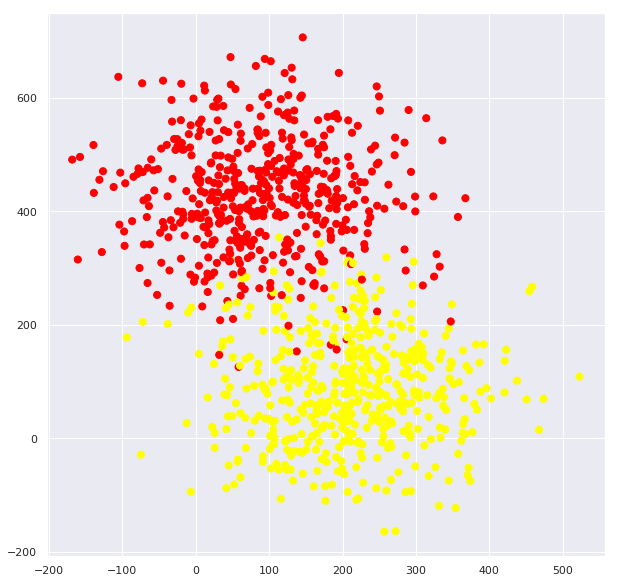

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0]*100, X[:, 1]*100, c=y, s=50, cmap='autumn');
plt.savefig('data.png')

In [0]:
from google.colab import files

In [0]:

files.download('data.png')

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)
for trainval_index, test_index in sss.split(X, y):
    X_trainval, X_test = X[trainval_index], X[test_index]
    y_trainval, y_test = y[trainval_index], y[test_index]

In [0]:
X_test.shape

(200, 2)

In [0]:
splits = np.linspace(0.99,0.01,100)
svm_accuracies = []
for i in splits:
    sss = StratifiedShuffleSplit(n_splits=1, test_size=i, random_state=0)
    for train_index, val_index in sss.split(X_trainval, y_trainval):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
        svm_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
splits

array([0.99      , 0.98010101, 0.97020202, 0.96030303, 0.95040404,
       0.94050505, 0.93060606, 0.92070707, 0.91080808, 0.90090909,
       0.8910101 , 0.88111111, 0.87121212, 0.86131313, 0.85141414,
       0.84151515, 0.83161616, 0.82171717, 0.81181818, 0.80191919,
       0.7920202 , 0.78212121, 0.77222222, 0.76232323, 0.75242424,
       0.74252525, 0.73262626, 0.72272727, 0.71282828, 0.70292929,
       0.6930303 , 0.68313131, 0.67323232, 0.66333333, 0.65343434,
       0.64353535, 0.63363636, 0.62373737, 0.61383838, 0.60393939,
       0.5940404 , 0.58414141, 0.57424242, 0.56434343, 0.55444444,
       0.54454545, 0.53464646, 0.52474747, 0.51484848, 0.50494949,
       0.49505051, 0.48515152, 0.47525253, 0.46535354, 0.45545455,
       0.44555556, 0.43565657, 0.42575758, 0.41585859, 0.4059596 ,
       0.39606061, 0.38616162, 0.37626263, 0.36636364, 0.35646465,
       0.34656566, 0.33666667, 0.32676768, 0.31686869, 0.3069697 ,
       0.29707071, 0.28717172, 0.27727273, 0.26737374, 0.25747

In [0]:
import warnings
warnings.filterwarnings('ignore')

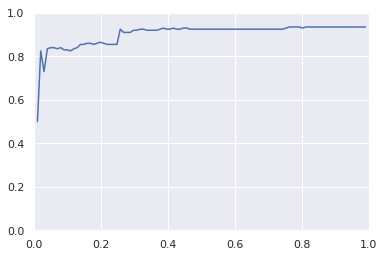

In [0]:
mlp_accuracies = []
for i in splits:
    sss = StratifiedShuffleSplit(n_splits=1, test_size=i, random_state=0)
    for train_index, val_index in sss.split(X_trainval, y_trainval):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)
        mlp_accuracies.append(accuracy_score(y_test, model.predict(X_test)))


plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(splits[::-1], mlp_accuracies, 'b')

In [0]:
splits

array([0.99      , 0.98010101, 0.97020202, 0.96030303, 0.95040404,
       0.94050505, 0.93060606, 0.92070707, 0.91080808, 0.90090909,
       0.8910101 , 0.88111111, 0.87121212, 0.86131313, 0.85141414,
       0.84151515, 0.83161616, 0.82171717, 0.81181818, 0.80191919,
       0.7920202 , 0.78212121, 0.77222222, 0.76232323, 0.75242424,
       0.74252525, 0.73262626, 0.72272727, 0.71282828, 0.70292929,
       0.6930303 , 0.68313131, 0.67323232, 0.66333333, 0.65343434,
       0.64353535, 0.63363636, 0.62373737, 0.61383838, 0.60393939,
       0.5940404 , 0.58414141, 0.57424242, 0.56434343, 0.55444444,
       0.54454545, 0.53464646, 0.52474747, 0.51484848, 0.50494949,
       0.49505051, 0.48515152, 0.47525253, 0.46535354, 0.45545455,
       0.44555556, 0.43565657, 0.42575758, 0.41585859, 0.4059596 ,
       0.39606061, 0.38616162, 0.37626263, 0.36636364, 0.35646465,
       0.34656566, 0.33666667, 0.32676768, 0.31686869, 0.3069697 ,
       0.29707071, 0.28717172, 0.27727273, 0.26737374, 0.25747

In [0]:
splits[::-1]

array([0.01      , 0.01989899, 0.02979798, 0.03969697, 0.04959596,
       0.05949495, 0.06939394, 0.07929293, 0.08919192, 0.09909091,
       0.1089899 , 0.11888889, 0.12878788, 0.13868687, 0.14858586,
       0.15848485, 0.16838384, 0.17828283, 0.18818182, 0.19808081,
       0.2079798 , 0.21787879, 0.22777778, 0.23767677, 0.24757576,
       0.25747475, 0.26737374, 0.27727273, 0.28717172, 0.29707071,
       0.3069697 , 0.31686869, 0.32676768, 0.33666667, 0.34656566,
       0.35646465, 0.36636364, 0.37626263, 0.38616162, 0.39606061,
       0.4059596 , 0.41585859, 0.42575758, 0.43565657, 0.44555556,
       0.45545455, 0.46535354, 0.47525253, 0.48515152, 0.49505051,
       0.50494949, 0.51484848, 0.52474747, 0.53464646, 0.54454545,
       0.55444444, 0.56434343, 0.57424242, 0.58414141, 0.5940404 ,
       0.60393939, 0.61383838, 0.62373737, 0.63363636, 0.64353535,
       0.65343434, 0.66333333, 0.67323232, 0.68313131, 0.6930303 ,
       0.70292929, 0.71282828, 0.72272727, 0.73262626, 0.74252

In [0]:
mlp_accuracies

[0.5,
 0.825,
 0.73,
 0.835,
 0.84,
 0.84,
 0.835,
 0.84,
 0.83,
 0.83,
 0.825,
 0.835,
 0.84,
 0.855,
 0.855,
 0.86,
 0.86,
 0.855,
 0.86,
 0.865,
 0.86,
 0.855,
 0.855,
 0.855,
 0.855,
 0.925,
 0.91,
 0.91,
 0.91,
 0.92,
 0.92,
 0.925,
 0.925,
 0.92,
 0.92,
 0.92,
 0.92,
 0.925,
 0.93,
 0.925,
 0.925,
 0.93,
 0.925,
 0.925,
 0.93,
 0.93,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.93,
 0.935,
 0.935,
 0.935,
 0.935,
 0.93,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935,
 0.935]

Text(0, 0.5, 'Accuracy')

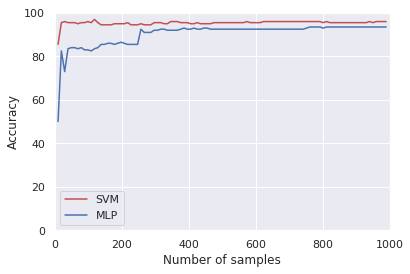

In [0]:
plt.xlim([0,1000])
plt.ylim([0,100])
plt.plot(np.array(splits[::-1])*1000, np.array(svm_accuracies)*100, 'r', label = 'SVM')
plt.plot(np.array(splits[::-1])*1000, np.array(mlp_accuracies)*100, 'b', label = 'MLP')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')

In [0]:
svm_accuracies

[0.855,
 0.955,
 0.96,
 0.955,
 0.955,
 0.955,
 0.95,
 0.955,
 0.955,
 0.96,
 0.955,
 0.97,
 0.955,
 0.945,
 0.945,
 0.945,
 0.945,
 0.95,
 0.95,
 0.95,
 0.95,
 0.955,
 0.945,
 0.945,
 0.945,
 0.95,
 0.945,
 0.945,
 0.945,
 0.955,
 0.955,
 0.955,
 0.95,
 0.95,
 0.96,
 0.96,
 0.96,
 0.955,
 0.955,
 0.955,
 0.95,
 0.95,
 0.955,
 0.95,
 0.95,
 0.95,
 0.95,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.96,
 0.955,
 0.955,
 0.955,
 0.955,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.955,
 0.96,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.955,
 0.96,
 0.955,
 0.96,
 0.96,
 0.96,
 0.96]

In [0]:
np.array(svm_accuracies)

array([0.855, 0.955, 0.96 , 0.955, 0.955, 0.955, 0.95 , 0.955, 0.955,
       0.96 , 0.955, 0.97 , 0.955, 0.945, 0.945, 0.945, 0.945, 0.95 ,
       0.95 , 0.95 , 0.95 , 0.955, 0.945, 0.945, 0.945, 0.95 , 0.945,
       0.945, 0.945, 0.955, 0.955, 0.955, 0.95 , 0.95 , 0.96 , 0.96 ,
       0.96 , 0.955, 0.955, 0.955, 0.95 , 0.95 , 0.955, 0.95 , 0.95 ,
       0.95 , 0.95 , 0.955, 0.955, 0.955, 0.955, 0.955, 0.955, 0.955,
       0.955, 0.955, 0.955, 0.96 , 0.955, 0.955, 0.955, 0.955, 0.96 ,
       0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.96 ,
       0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.955,
       0.96 , 0.955, 0.955, 0.955, 0.955, 0.955, 0.955, 0.955, 0.955,
       0.955, 0.955, 0.955, 0.955, 0.96 , 0.955, 0.96 , 0.96 , 0.96 ,
       0.96 ])

In [0]:
a = np.array(svm_accuracies) - np.append([0],np.array(svm_accuracies)[:-1])

In [0]:
a.shape

(100,)

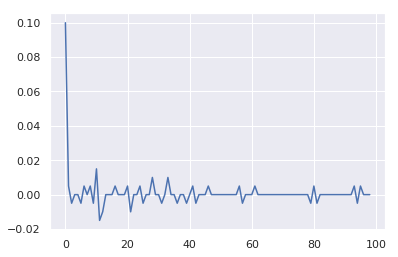

In [0]:
svm_cs = np.array(svm_accuracies) - np.append([0],np.array(svm_accuracies)[:-1])

plt.plot(svm_cs[1:])

In [0]:
svm_cs 

array([ 0.855,  0.1  ,  0.005, -0.005,  0.   ,  0.   , -0.005,  0.005,
        0.   ,  0.005, -0.005,  0.015, -0.015, -0.01 ,  0.   ,  0.   ,
        0.   ,  0.005,  0.   ,  0.   ,  0.   ,  0.005, -0.01 ,  0.   ,
        0.   ,  0.005, -0.005,  0.   ,  0.   ,  0.01 ,  0.   ,  0.   ,
       -0.005,  0.   ,  0.01 ,  0.   ,  0.   , -0.005,  0.   ,  0.   ,
       -0.005,  0.   ,  0.005, -0.005,  0.   ,  0.   ,  0.   ,  0.005,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.005, -0.005,  0.   ,  0.   ,  0.   ,  0.005,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.005,  0.005, -0.005,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.005, -0.005,
        0.005,  0.   ,  0.   ,  0.   ])

In [0]:
mlp_cs = np.array(mlp_accuracies) - np.append([0],np.array(mlp_accuracies)[:-1])
#plt.xlim([0,1])
#plt.ylim([0,1])


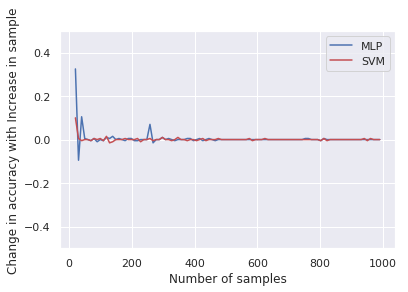

In [0]:
plt.ylim([-0.5,0.5])
plt.xlabel('Number of samples')
plt.ylabel('Change in accuracy with Increase in sample')
plt.plot((np.array(splits[::-1])*1000)[1:], mlp_cs[1:],'b', label='MLP')
plt.plot((np.array(splits[::-1])*1000)[1:], svm_cs[1:], 'r', label = 'SVM')
plt.grid(True)
plt.legend()
plt.savefig('Change_in_accuracy.png')
plt.show()

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test'\"" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 38445
Date of submission:  09 Mar 2019
Time of submission:  11:54:09
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
